# Part 2: NLP Code

## We will be following this steps:-

1. Reading of file.
2. Clean the input file.
3. Use previous input to generate word vectors for this corpus.

In [79]:
# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

#make compatible with Python 2 and Python 3
from __future__ import print_function, division, absolute_import

In [80]:
import numpy as np       #importing numpy and pandas packages to create a dataframe
import pandas as pd

train = pd.read_csv("prideNprejudice.csv",delimiter="\t")
# train.shape should be (25000,3)

In [81]:
train.head()   #displaying the head of the train dataframe

,sentences
0,"It is a truth universally acknowledged, that a..."
1,"""My dear Mr. Bennet,"" said his lady to him one..."
2,Bennet replied that he had not.
3,"""But it is,"" returned she; ""for Mrs. Long has ..."
4,Bennet made no answer.


In [82]:
# import packages

import bs4 as bs
import nltk
# nltk.download('all')
from nltk.tokenize import sent_tokenize # tokenizes sentences
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

eng_stopwords = stopwords.words('english')

## Cleaning the sentences

In [83]:
from nltk.corpus import stopwords
from nltk.util import ngrams


ps = PorterStemmer()
wnl = WordNetLemmatizer()
#defining the function for the cleaner
def sentence_cleaner(sentences,lemmatize=True,stem=False):   
    '''
    Clean and preprocess a review.

    1. Remove HTML tags
    2. Use regex to remove all special characters (only keep letters)
    3. Make strings to lower case and tokenize / word split reviews
    4. Remove English stopwords
    5. Rejoin to one string
    '''
    ps = PorterStemmer()
    wnl = WordNetLemmatizer()
    #1. Remove HTML tags
    sentences = bs.BeautifulSoup(sentences).text
    #2. Remove punctuation
    sentences = re.sub("[^a-zA-Z]", " ",sentences)
    
    #3. Tokenize into words (all lower case)
    sentences = sentences.lower().split()
    
    #4.Set stopwords
    eng_stopwords = set(stopwords.words("english"))

    clean_sentences=[]
    for word in sentences:
        if word not in eng_stopwords:
            if lemmatize is True:
                word=wnl.lemmatize(word)
            elif stem is True:
                if word == 'oed':
                    continue
                word=ps.stem(word)
            clean_sentences.append(word)
    return(clean_sentences)

In [84]:
num_sentences = len(train['sentences'])

sentence_clean_original = []      #creating the bag of words

for i in range(0,num_sentences):
    if( (i+1)%1000 == 0 ):
        # print progress
        print("Done with %d sentences" %(i+1)) 
    sentence_clean_original.append(review_cleaner(train['sentences'][i])) 

Done with 1000 sentences
Done with 2000 sentences
Done with 3000 sentences
Done with 4000 sentences
Done with 5000 sentences


In [85]:
train['sentences'][0]    #displaying the train data

'It is a truth universally acknowledged, that a single man in possessionof a good fortune, must be in want of a wife.However little known the feelings or views of such a man may be on hisfirst entering a neighbourhood, this truth is so well fixed in the mindsof the surrounding families, that he is considered the rightful propertyof some one or other of their daughters.'

In [86]:
sentence_clean_original[0]    #displaying the bag of words

['truth',
 'universally',
 'acknowledged',
 'single',
 'man',
 'possessionof',
 'good',
 'fortune',
 'must',
 'want',
 'wife',
 'however',
 'little',
 'known',
 'feeling',
 'view',
 'man',
 'may',
 'hisfirst',
 'entering',
 'neighbourhood',
 'truth',
 'well',
 'fixed',
 'mindsof',
 'surrounding',
 'family',
 'considered',
 'rightful',
 'propertyof',
 'one',
 'daughter']

In [87]:
len(sentence_clean_original)   #length of the BOW

5370

## Converting words to Distributed representation

In [74]:
!pip install gensim             #installing genism

You are using pip version 8.1.2, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [191]:
sen=sentence_clean_original                     #defining the values for training word2vec model
# Set values for various parameters
num_features = 500    # Word vector dimensionality                      
min_word_count = 5   # ignore all words with total frequency lower than this                       
num_workers = 5       # Number of threads to run in parallel
context = 4          # Context window size  



# Initialize and train the model (this will take some time)
from gensim.models import word2vec                       




print("Training word2vec model... ")
model = word2vec.Word2Vec(sen, workers=num_workers, \
           size=num_features, min_count = min_word_count, \
            window = context, iter = 50)


# save the model for later use. You can load it later using Word2Vec.load()
model_name = "500features_5minwords_4context"
model.save(model_name)

Training word2vec model... 


## Exploring model results

In [192]:
# Get vocabulary count of the model
vocab_tmp = list(model.wv.vocab)
print('Vocab length:',len(vocab_tmp))

Vocab length: 1745


In [193]:
# Get Vocabulary words
vocab_tmp[0]

'finished'

# Testing Similiarity

In [194]:
# Get cosine similarity of words
from sklearn.metrics.pairwise import cosine_similarity

model.similarity('girl','boy')

0.69198932991509654

In [195]:
model.similarity('woman', 'men')

0.83635626223417825

In [196]:
model.similarity('family', 'daughter')

0.18927051314399757

In [198]:
model.similarity('death', 'little')

0.42759598757792727

In [199]:
model.similarity('one', 'single')

0.53739901863610628

## Testing doesnt match

In [214]:
model.doesnt_match('man woman till girl'.split())          #testing the doesnt_match function

'till'

In [215]:
model.doesnt_match('man world till'.split())

'till'

In [216]:
model.doesnt_match('man woman girl'.split())

'girl'

In [218]:
model.doesnt_match('earth saturn love'.split())

'love'

In [219]:
model.doesnt_match('mars jupiter men'.split())

'men'

# Testing most similarity

In [212]:
model.most_similar("word")                      # testing most similiarity function

[('interruption', 0.6156398057937622),
 ('lip', 0.5808097124099731),
 ('saying', 0.5720919370651245),
 ('speak', 0.5649688243865967),
 ('couldnot', 0.5605394244194031),
 ('valuable', 0.551924467086792),
 ('depend', 0.5424071550369263),
 ('without', 0.5264490842819214),
 ('anything', 0.525322437286377),
 ('upon', 0.5175555348396301)]

In [211]:
model.most_similar("till")

[('visitor', 0.8308674097061157),
 ('saturday', 0.8094621896743774),
 ('sunday', 0.781827986240387),
 ('returning', 0.7711752653121948),
 ('dressing', 0.768431544303894),
 ('along', 0.7605604529380798),
 ('got', 0.7460013628005981),
 ('chaise', 0.7387632131576538),
 ('downstairs', 0.734905481338501),
 ('hastily', 0.732915461063385)]

In [210]:
model.most_similar("girl")

[('extremely', 0.6928129196166992),
 ('boy', 0.6919894218444824),
 ('king', 0.6907191276550293),
 ('youngest', 0.6818444132804871),
 ('tall', 0.6741129159927368),
 ('younger', 0.6674612760543823),
 ('neighbourhood', 0.6519386768341064),
 ('son', 0.6438463926315308),
 ('married', 0.6389352679252625),
 ('sixteen', 0.6349356770515442)]

In [201]:
model.most_similar("man")

[('woman', 0.887626051902771),
 ('men', 0.7938704490661621),
 ('person', 0.771087646484375),
 ('accomplished', 0.7617754340171814),
 ('totally', 0.7365685701370239),
 ('fortune', 0.7360684871673584),
 ('feature', 0.7358312606811523),
 ('people', 0.7333755493164062),
 ('represented', 0.7166950106620789),
 ('influence', 0.7125266194343567)]

In [202]:
model.most_similar(positive=['husband','man'], negative=['woman'])

[('married', 0.6512598991394043),
 ('get', 0.6474043130874634),
 ('glad', 0.6298869848251343),
 ('introduce', 0.6025815010070801),
 ('ball', 0.5817509889602661),
 ('fond', 0.5778319835662842),
 ('jones', 0.5764567852020264),
 ('going', 0.5746958255767822),
 ('unless', 0.5700502395629883),
 ('fun', 0.5680896043777466)]

In [203]:
from gensim.models import Word2Vec
# Load the trained modelNumeric Representations of Words
model = Word2Vec.load("500features_5minwords_4context")

In [205]:
type(model.wv.syn0)

numpy.ndarray

In [206]:
model.wv.syn0.shape

(1745, 500)

In [207]:
model.corpus_count

5370

In [222]:
model['man']

array([-0.36131841, -0.81537086, -0.14247836,  0.39211252,  0.67789811,
       -0.16140679, -0.01138907,  0.01033306, -0.29547125, -0.22973739,
        0.02962612,  0.13183831,  0.06549638,  0.20820524,  0.30978179,
        0.85709476,  0.38575253,  0.38823771, -0.40243593,  0.59000969,
       -0.28920507, -0.25811753, -0.37567407,  0.36098748, -0.65972841,
       -0.3891885 ,  0.31896496, -0.05828851,  0.2915715 ,  0.09568696,
        0.25175041, -0.24978305,  0.01890122, -0.01794224, -0.15193026,
       -0.14454165, -0.54817426,  0.29016849,  0.28115851, -0.39148074,
       -0.40037295, -0.30560145,  0.16964601, -0.06035028,  0.41267678,
        0.13714166,  0.44918919, -0.2703504 ,  0.22741243, -0.66906238,
       -0.23391968, -0.40851006, -0.14068617, -0.17025027, -0.00417723,
        0.53270048,  0.25812277,  0.06497595,  0.16823198,  0.07536516,
        0.15021773, -0.02742549, -0.79093271,  0.17253868, -0.70680702,
        0.42492446, -0.54496932,  0.78393608,  0.04746826, -0.18

In [208]:
# Get vocabulary count of the model
vocab_tmp = list(model.wv.vocab)
print('Vocab length:',len(vocab_tmp))

# Get distributional representation of each word
X = model[vocab_tmp]


Vocab length: 1745


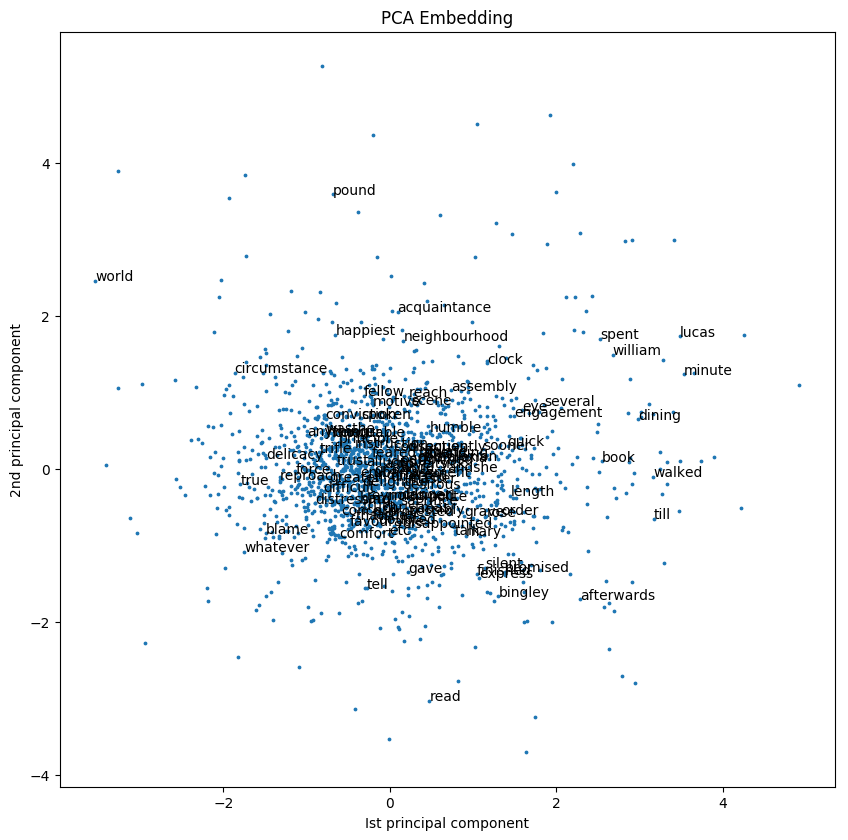

In [209]:
from sklearn import decomposition
# get two principle components of the feature space
pca= decomposition.PCA(n_components=2).fit_transform(X)

# set figure settings
plt.figure(figsize=(10,10),dpi=100)

# save pca values and vocab in dataframe df
df = pd.concat([pd.DataFrame(pca),pd.Series(vocab_tmp)],axis=1)
df.columns = ['x', 'y', 'word']



plt.xlabel("Ist principal component")
plt.ylabel('2nd principal component')


plt.scatter(x=pca[:, 0], y=pca[:, 1],s=3)
for i, word in enumerate(df['word'][0:100]):
    plt.annotate(word, (df['x'].iloc[i], df['y'].iloc[i]))
plt.title("PCA Embedding")
plt.show()                                      #plotting the PCA Embedding graph
